In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
raw_data = pd.read_csv("../../data/raw-data/g_2010_2023.csv", index_col="Date", parse_dates=["Date"])
raw_data.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2025-05-07,"3,399.99","3,409.27","3,409.94","3,368.05",157.51K,-0.27%
2025-05-06,"3,409.06","3,345.70","3,444.50","3,332.10",36.71K,2.61%
2025-05-05,"3,322.30","3,247.10","3,346.70","3,243.10",184.90K,2.44%
2025-05-02,"3,243.30","3,247.60","3,277.00","3,229.50",210.99K,0.65%
2025-05-01,"3,222.20","3,299.00","3,300.60","3,209.40",214.69K,-2.92%


In [19]:
def treat(df_raw):
    df = df_raw.copy().iloc[::-1]
    df.drop(columns=['Change %'], inplace=True)

    # Remove commas and convert to float for the 'Close' column
    df['Price'] = df['Price'].replace(",", "", regex=True).astype(float)
    df['Open'] = df['Open'].replace(",", "", regex=True).astype(float)
    df['High'] = df['High'].replace(",", "", regex=True).astype(float)
    df['Low'] = df['Low'].replace(",", "", regex=True).astype(float)
    df['Vol.'] = df['Vol.'].replace("K", "e3", regex=True).astype(float)


    df.rename(columns={'Price': 'close'}, inplace=True)
    df.rename(columns={'Open': 'open'}, inplace=True)
    df.rename(columns={'High': 'high'}, inplace=True)
    df.rename(columns={'Low': 'low'}, inplace=True)
    df.rename(columns={'Vol.': 'volume'}, inplace=True)
    
    return df

In [4]:
data = treat(raw_data)
data.head()
data.to_csv("../../data/processed-data/g_2010_2023.csv", index=True)


In [20]:
import pandas_ta as ta

# Add several technical indicators
data['SMA_20'] = ta.sma(data['close'], length=20)  # 50-day Simple Moving Average
data['RSI'] = ta.rsi(data['close'], length=14)  # Relative Strength Index (14-day)
# data['MACD'] = ta.macd(data['close'])['MACD']  # MACD (Moving Average Convergence Divergence)
data['ATR'] = ta.atr(data['high'], data['low'], data['close'], length=14)  # Average True Range
data.ta.macd(append=True)

data.dropna(inplace=True)
data.head(34)

,close,open,high,low,volume,SMA_20,RSI,ATR,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,target
Date,,,,,,,,,,,,
2010-05-26,1213.4,1203.8,1216.9,1201.0,237500.0,1200.590,58.161234,22.984546,14.570450,-7.178611,21.749061,0
2010-05-27,1214.4,1213.5,1220.6,1207.4,138270.0,1202.870,58.479863,22.224474,14.557619,-5.753153,20.310773,0
2010-05-28,1215.0,1213.4,1217.3,1203.8,96000.0,1204.585,58.683178,21.550961,14.429532,-4.704993,19.134524,0
2010-05-31,1226.9,1216.7,1230.6,1211.6,107410.0,1206.765,62.595337,21.355161,15.114027,-3.216398,18.330425,0
2010-06-02,1222.6,1227.7,1228.9,1215.0,90250.0,1209.435,60.370884,20.785970,15.135052,-2.556298,17.691350,0
2010-06-03,1210.0,1225.2,1226.5,1202.4,115430.0,1211.185,54.283434,21.037753,13.973918,-2.973946,16.947864,1
2010-06-04,1217.7,1208.5,1222.0,1198.1,139930.0,1212.205,57.128433,21.254228,13.519195,-2.742935,16.262130,0
2010-06-07,1240.8,1221.1,1246.7,1212.1,154990.0,1213.725,64.305069,22.259357,14.851601,-1.128423,15.980024,0
2010-06-08,1245.6,1242.6,1254.5,1235.0,143920.0,1215.965,65.593914,22.052342,16.109166,0.103313,16.005853,0


## Now we are going to add the target (buy or sell or hold)

In [21]:
def add_target(df, lookahead=5):
    """
    Add a 'target' column to the DataFrame.
    Look ahead up to number(lookahead) days; as soon as:
      - Close ≥ current_close + 1.5*ATR  ⇒ target = 1
      - Close ≤ current_close − 1.5*ATR  ⇒ target = -1
    If neither threshold is hit within 7 days ⇒ target = 0
    """
    df = df.copy()
    closes = df['close'].values
    atrs   = df['ATR'].values
    n      = len(df)
    targets = np.zeros(n, dtype=int)

    for i in range(n):
        up_thresh   = closes[i] + 1.5 * atrs[i]
        down_thresh = closes[i] - 1.5 * atrs[i]
        # look ahead day by day
        for future_close in closes[i+1 : i+1+lookahead]:
            if future_close >= up_thresh:
                targets[i] = 1
                break
            elif future_close <= down_thresh:
                targets[i] = -1
                break
        # if loop exits normally, targets[i] stays 0

    df['target'] = targets
    return df
data = add_target(data)
data.dropna(inplace=True)
data.to_csv("../../data/processed-data/g_2010_2023_with_target.csv", index=True)
data.head(20)

,close,open,high,low,volume,SMA_20,RSI,ATR,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,target
Date,,,,,,,,,,,,
2010-05-26,1213.4,1203.8,1216.9,1201.0,237500.0,1200.590,58.161234,22.984546,14.570450,-7.178611,21.749061,0
2010-05-27,1214.4,1213.5,1220.6,1207.4,138270.0,1202.870,58.479863,22.224474,14.557619,-5.753153,20.310773,0
2010-05-28,1215.0,1213.4,1217.3,1203.8,96000.0,1204.585,58.683178,21.550961,14.429532,-4.704993,19.134524,0
2010-05-31,1226.9,1216.7,1230.6,1211.6,107410.0,1206.765,62.595337,21.355161,15.114027,-3.216398,18.330425,0
2010-06-02,1222.6,1227.7,1228.9,1215.0,90250.0,1209.435,60.370884,20.785970,15.135052,-2.556298,17.691350,0
2010-06-03,1210.0,1225.2,1226.5,1202.4,115430.0,1211.185,54.283434,21.037753,13.973918,-2.973946,16.947864,1
2010-06-04,1217.7,1208.5,1222.0,1198.1,139930.0,1212.205,57.128433,21.254228,13.519195,-2.742935,16.262130,0
2010-06-07,1240.8,1221.1,1246.7,1212.1,154990.0,1213.725,64.305069,22.259357,14.851601,-1.128423,15.980024,0
2010-06-08,1245.6,1242.6,1254.5,1235.0,143920.0,1215.965,65.593914,22.052342,16.109166,0.103313,16.005853,0


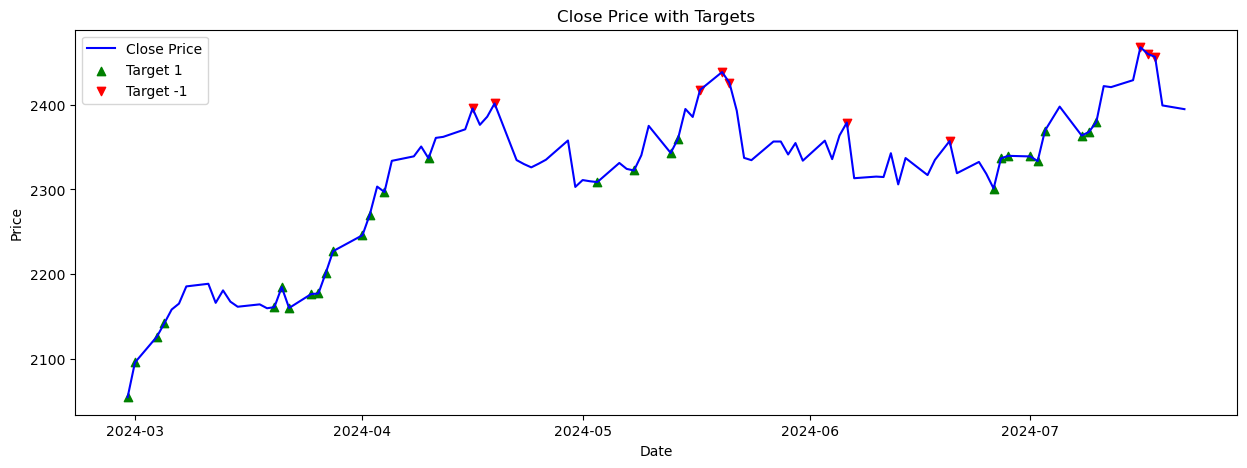

In [23]:
#PLOT THE TARGET for 300 -200days
plt.figure(figsize=(15, 5))
plt.plot(data.index[-300:-200], data['close'][-300:-200], label='Close Price', color='blue')
# plt.plot(data.index[-300:-200], data['SMA_20'][-300:-200], label='SMA 20', color='orange')
plt.scatter(data.index[-300:-200][data['target'][-300:-200] == 1], data['close'][-300:-200][data['target'][-300:-200] == 1], marker='^', color='green', label='Target 1')
plt.scatter(data.index[-300:-200][data['target'][-300:-200] == -1], data['close'][-300:-200][data['target'][-300:-200] == -1], marker='v', color='red', label='Target -1')
plt.title('Close Price with Targets')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

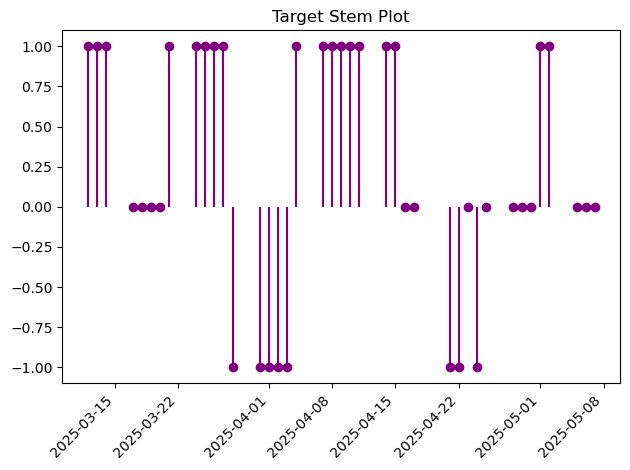

In [7]:
ser = data['target'].iloc[-40:]
plt.stem(ser.index, ser.values, linefmt='purple', markerfmt='o', basefmt=' ')
plt.xticks(rotation=45, ha='right')
plt.title('Target Stem Plot')
plt.tight_layout()
plt.show()

In [33]:

scaled_data.to_csv("../../data/processed-data/for_java_proj.csv", index=True)

In [24]:
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

# # Feature columns (you can add more)
# features = ['close', 'open', 'high', 'low', 'volume', 'SMA_20', 'RSI', 'ATR', 
#             'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9', 'target']


# target_col = 'target'

seq_len = 20  # how many past days to use

features = data.drop(columns=['target'])
target = data['target']

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)

scaled_data['target'] = target.values

# Encode target as 0, 1, 2
target_map = {-1: 0, 0: 1, 1: 2}
y = target.map(target_map).values

# Create sequences
X, Y = [], []
for i in range(seq_len, len(data)):
    X.append(scaled_data[i-seq_len:i])
    Y.append(y[i])

X = np.array(X)
Y = to_categorical(Y, num_classes=3)
print(X.shape, Y.shape)


import joblib
joblib.dump(scaler, 'scaler.pkl')

2025-05-18 23:04:50.727567: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-18 23:04:50.828859: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-18 23:04:50.909142: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747605890.995682   66616 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747605891.020936   66616 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747605891.190326   66616 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

(3789, 20, 12) (3789, 3)


['scaler.pkl']

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(64, input_shape=(seq_len, 12), return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: -1, 0, 1
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.5472 - loss: 0.9723 - val_accuracy: 0.5992 - val_loss: 0.9771
Epoch 2/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.6380 - loss: 0.8477 - val_accuracy: 0.6018 - val_loss: 0.9339
Epoch 3/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.6756 - loss: 0.7601 - val_accuracy: 0.6109 - val_loss: 0.9858
Epoch 4/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7121 - loss: 0.7096 - val_accuracy: 0.6407 - val_loss: 0.8963
Epoch 5/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7384 - loss: 0.6789 - val_accuracy: 0.6654 - val_loss: 0.8281
Epoch 6/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7496 - loss: 0.6517 - val_accuracy: 0.6770 - val_loss: 0.8634
Epoch 7/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7415 - loss: 0.6408 - val_accuracy: 0.6783 - val_loss: 0.8606
Epoch 8/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7508 - loss: 0.6427 - val_accuracy: 0.6809 - 

In [14]:
loss, acc = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {acc:.2f}")

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6832 - loss: 0.8490
Test Accuracy: 0.62


In [15]:
import sys
import os
sys.path.append(os.path.abspath("../.."))


import pandas as pd
import numpy as np

# Read the CSV file
df_raw = pd.read_csv('../../data/raw-data/2025.csv', index_col="Date", parse_dates=["Date"])
print(os.getcwd())

import joblib

scaler = joblib.load('./scaler.pkl')



from scripts.process import process

process = process(df_raw, scaler)

/home/elm19/Desktop/GoldSpot-Predictor/notebooks/new_approach_exp1
             close    open    high     low    volume
Date                                                
2025-05-01  3222.2  3299.0  3300.6  3209.4  214690.0
2025-04-30  3319.1  3324.5  3337.6  3275.6  207720.0
2025-04-29  3333.6  3354.9  3359.3  3309.2  170150.0
2025-04-28  3333.0  3318.3  3347.7  3266.3    1300.0
2025-04-25  3298.4  3362.0  3384.1  3274.8  241250.0
after treatment 
 ---------------------------------------
               close      open      high       low    volume    SMA_20  \
Date                                                                     
2025-03-14  3.466950  3.470476  3.448877  3.497794  0.397344  3.742442   
2025-03-13  3.442971  3.328194  3.411029  3.383189  1.064527  3.719112   
2025-03-12  3.334085  3.276766  3.283415  3.306127  0.649127  3.702498   
2025-03-11  3.270712  3.205502  3.235135  3.235734  0.509593  3.693815   
2025-03-10  3.218104  3.270154  3.228827  3.242403  0.753910

In [16]:
X_val, Y_val = process

In [26]:
predictions = model.predict(X_val)


class_map = {0: "sell", 1: "hold", 2: "buy"}
predicted_classes = np.argmax(predictions, axis=1)



predicted_labels = [class_map[i] for i in predicted_classes]

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [30]:
print(predicted_labels.count("buy"), predicted_labels.count("sell"), predicted_labels.count("hold"))

19 48 218


In [43]:
import tensorflow as tf
from keras.models import Model
from keras.layers import (
    Input, Conv1D, BatchNormalization, Dropout,
    Bidirectional, LSTM, Dense, MultiHeadAttention,
    GlobalAveragePooling1D, LayerNormalization
)

def create_trading_model(input_shape, num_classes=3):
    """
    Creates a neural network model for trading signal prediction.
    
    Architecture:
    - Temporal Convolutional Network (TCN) for local pattern detection
    - Bidirectional LSTM for temporal dependencies
    - Multi-head Attention for capturing cross-feature relationships
    - Deep classifier head with regularization
    
    Args:
        input_shape (tuple): Shape of input data (timesteps, features)
        num_classes (int): Number of output classes (buy/hold/sell)
        
    Returns:
        tf.keras.Model: Compiled trading prediction model
    """
    # Input layer
    inputs = Input(shape=input_shape, name='price_data')
    
    # Temporal Convolution Block
    x = Conv1D(64, kernel_size=3, padding='causal', activation='relu', 
               name='temporal_conv1')(inputs)
    x = BatchNormalization(name='bn1')(x)
    x = Dropout(0.2, name='drop1')(x)
    
    x = Conv1D(128, kernel_size=3, padding='causal', activation='relu', 
               name='temporal_conv2')(x)
    x = BatchNormalization(name='bn2')(x)
    x = Dropout(0.3, name='drop2')(x)
    
    # Bidirectional LSTM Block
    x = Bidirectional(
        LSTM(128, return_sequences=True, recurrent_dropout=0.2),
        name='bi_lstm1'
    )(x)
    x = Bidirectional(
        LSTM(64, return_sequences=True, recurrent_dropout=0.2),
        name='bi_lstm2'
    )(x)
    
    # Attention Mechanism
    attention_output = MultiHeadAttention(
        num_heads=4, key_dim=64, dropout=0.3,
        name='mh_attention'
    )(x, x)  # Self-attention
    
    # Residual Connection
    x = LayerNormalization(name='ln1')(x + attention_output)
    
    # Feature Pooling
    x = GlobalAveragePooling1D(name='global_avg_pool')(x)
    
    # Classification Head
    x = Dense(256, activation='relu', name='dense1')(x)
    x = Dropout(0.4, name='drop3')(x)
    
    x = Dense(128, activation='relu', name='dense2')(x)
    x = Dropout(0.3, name='drop4')(x)
    
    outputs = Dense(num_classes, activation='softmax', name='predictions')(x)
    
    return Model(inputs=inputs, outputs=outputs, name='TradingModel')


model_combined = create_trading_model(input_shape=(20, 12))  # 30 timesteps, 10 features
model_combined.summary()

Model: "TradingModel"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ price_data          │ (None, 20, 12)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ temporal_conv1      │ (None, 20, 64)    │      2,368 │ price_data[0][0]  │
│ (Conv1D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn1                 │ (None, 20, 64)    │        256 │ temporal_conv1[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ drop1 (Dropout)     │ (None, 20, 64)    │          0 │ bn1[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ temporal_conv2      │ (None, 20, 128)   │     24,704 │ drop1[0][0]       │
│ (Conv1D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn2                 │ (None, 20, 128)   │        512 │ temporal_conv2[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ drop2 (Dropout)     │ (None, 20, 128)   │          0 │ bn2[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bi_lstm1            │ (None, 20, 256)   │    263,168 │ drop2[0][0]       │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bi_lstm2            │ (None, 20, 128)   │    164,352 │ bi_lstm1[0][0]    │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mh_attention        │ (None, 20, 128)   │    131,968 │ bi_lstm2[0][0],   │
│ (MultiHeadAttentio… │                   │            │ bi_lstm2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 20, 128)   │          0 │ bi_lstm2[0][0],   │
│                     │                   │            │ mh_attention[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ln1                 │ (None, 20, 128)   │        256 │ add_4[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_avg_pool     │ (None, 128)       │          0 │ ln1[0][0]         │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense1 (Dense)      │ (None, 256)       │     33,024 │ global_avg_pool[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ drop3 (Dropout)     │ (None, 256)       │          0 │ dense1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense2 (Dense)      │ (None, 128)       │     32,896 │ drop3[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ drop4 (Dropout)     │ (None, 128)       │          0 │ dense2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ predictions (Dense) │ (None, 3)         │        387 │ drop4[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 653,891 (2.49 MB)

 Trainable params: 653,507 (2.49 MB)

 Non-trainable params: 384 (1.50 KB)

In [44]:
model_combined.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)
history = model_combined.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 18s 84ms/step - accuracy: 0.5407 - loss: 1.0651 - val_accuracy: 0.5992 - val_loss: 1.1996
Epoch 2/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.6289 - loss: 0.9350 - val_accuracy: 0.5992 - val_loss: 1.1334
Epoch 3/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.6159 - loss: 0.9108 - val_accuracy: 0.5992 - val_loss: 1.1011
Epoch 4/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.6249 - loss: 0.8918 - val_accuracy: 0.5992 - val_loss: 1.1384
Epoch 5/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.6170 - loss: 0.8825 - val_accuracy: 0.5992 - val_loss: 1.1219
Epoch 6/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.6320 - loss: 0.8475 - val_accuracy: 0.5875 - val_loss: 1.0524
Epoch 7/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 94ms/step - accuracy: 0.6660 - loss: 0.7711 - val_accuracy: 0.6161 - val_loss: 0.8697
Epoch 8/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.7108 - loss: 0.7184 - val_accuracy: 0.6615 - 

In [45]:
history = model_combined.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.7730 - loss: 0.5771 - val_accuracy: 0.6265 - val_loss: 1.0056
Epoch 2/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.7909 - loss: 0.5551 - val_accuracy: 0.6005 - val_loss: 1.2192
Epoch 3/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.7654 - loss: 0.5867 - val_accuracy: 0.6304 - val_loss: 0.9284
Epoch 4/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.7814 - loss: 0.5471 - val_accuracy: 0.6368 - val_loss: 1.1503
Epoch 5/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.7923 - loss: 0.5185 - val_accuracy: 0.5811 - val_loss: 1.3406
Epoch 6/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.7771 - loss: 0.5534 - val_accuracy: 0.6135 - val_loss: 0.9971
Epoch 7/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.7836 - loss: 0.5364 - val_accuracy: 0.5927 - val_loss: 1.1542
Epoch 8/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.7831 - loss: 0.5248 - val_accuracy: 0.6459 - v

In [46]:
model_combined.evaluate(X_test, Y_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.6070 - loss: 1.1388


[1.2260663509368896, 0.5667963624000549]

In [62]:
def create_robust_model(input_shape):
    inputs = Input(shape=input_shape)
    
    x = Conv1D(32, 3, padding='causal', activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    
    x = Bidirectional(LSTM(64, return_sequences=True))(x)
    x = Dropout(0.4)(x)
    
    x = GlobalAveragePooling1D()(x)
    
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)
    
    outputs = Dense(3, activation='softmax')(x)
    
    return Model(inputs, outputs)


robust_model = create_robust_model(input_shape=(20, 12))
robust_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = robust_model.fit(X_train, Y_train, epochs=50, batch_size=128, validation_data=(X_test, Y_test))

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.4691 - loss: 1.0442 - val_accuracy: 0.5992 - val_loss: 1.0225
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6281 - loss: 0.9249 - val_accuracy: 0.5992 - val_loss: 1.0364
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.6191 - loss: 0.9089 - val_accuracy: 0.5992 - val_loss: 1.0245
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.6208 - loss: 0.9009 - val_accuracy: 0.5927 - val_loss: 1.0264
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6302 - loss: 0.8786 - val_accuracy: 0.5992 - val_loss: 1.0571
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6432 - loss: 0.8428 - val_accuracy: 0.5979 - val_loss: 1.0688
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.6404 - loss: 0.8325 - val_accuracy: 0.5953 - val_loss: 1.1228
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.6588 - loss: 0.8001 - val_accuracy: 0.5979 - v

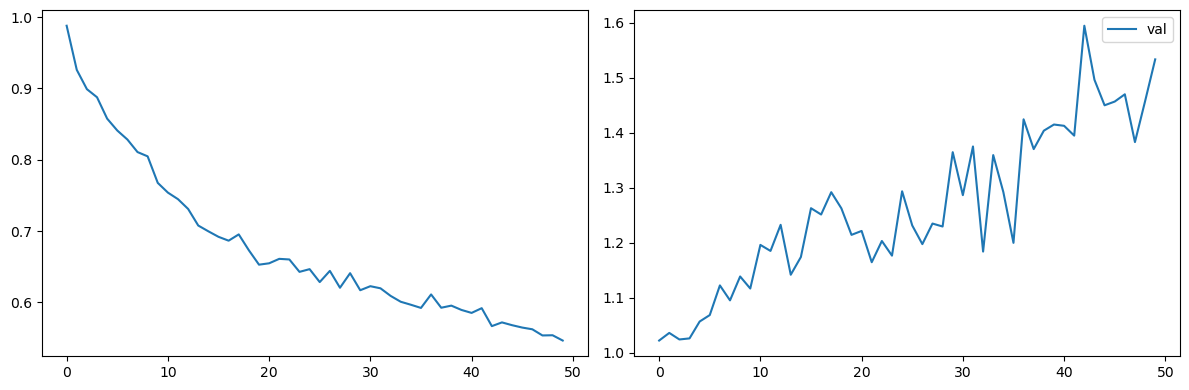

In [74]:
# plot the history of accuracy and loss of both the valiation an training set
import matplotlib.pyplot as plt
def plot_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1,2,1)
    # Plot training & validation accuracy values
    plt.plot(history.history['loss'], label='train')
    plt.subplot(1,2,2)
    plt.plot(history.history['val_loss'], label='val')
    plt.legend()
        
    plt.tight_layout()
    plt.show()
plot_history(history)
# Evaluate the model on the test set

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model_simple = Sequential([
    LSTM(64, input_shape=(seq_len, 12), return_sequences=False),
    Dropout(0.4),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: -1, 0, 1
])

model_simple.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_simple = model_simple.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.5836 - loss: 0.9530 - val_accuracy: 0.5888 - val_loss: 0.9940
Epoch 2/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6369 - loss: 0.8428 - val_accuracy: 0.5914 - val_loss: 0.9768
Epoch 3/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6571 - loss: 0.7813 - val_accuracy: 0.5914 - val_loss: 0.8857
Epoch 4/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7009 - loss: 0.7252 - val_accuracy: 0.6226 - val_loss: 0.8908
Epoch 5/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7323 - loss: 0.6773 - val_accuracy: 0.6394 - val_loss: 0.8184
Epoch 6/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7258 - loss: 0.6762 - val_accuracy: 0.6550 - val_loss: 0.8244
Epoch 7/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7547 - loss: 0.6481 - val_accuracy: 0.6602 - val_loss: 0.8193
Epoch 8/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7526 - loss: 0.6451 - val_accuracy: 0.6589 - val_los

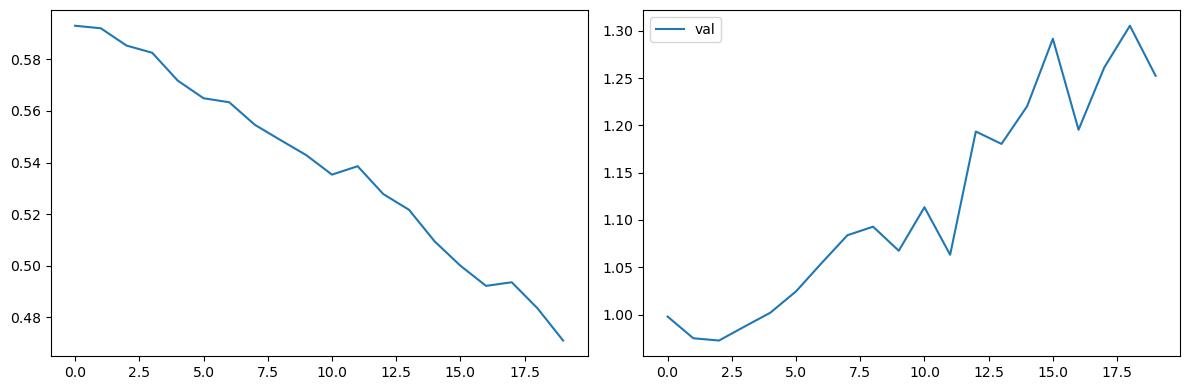

In [76]:
plot_history(history_simple)

In [83]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten, BatchNormalization

model_cnn_lstm = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(seq_len, 12)),
    MaxPooling1D(pool_size=2),
    BatchNormalization(),
    
    LSTM(32, return_sequences=False),
    Dropout(0.3),
    
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # for 3-class classification: buy, hold, sell
])
model_cnn_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_cnn_lstm = model_cnn_lstm.fit(X_train, Y_train, epochs=30, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5220 - loss: 1.0063 - val_accuracy: 0.5992 - val_loss: 0.9537
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6256 - loss: 0.9078 - val_accuracy: 0.5992 - val_loss: 0.9506
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6244 - loss: 0.8860 - val_accuracy: 0.5992 - val_loss: 0.9446
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6442 - loss: 0.8471 - val_accuracy: 0.5863 - val_loss: 0.9636
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6469 - loss: 0.8317 - val_accuracy: 0.6031 - val_loss: 0.9947
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6565 - loss: 0.8016 - val_accuracy: 0.6057 - val_loss: 0.9097
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6873 - loss: 0.7604 - val_accuracy: 0.6109 - val_loss: 0.9009
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7004 - loss: 0.7283 - val_accuracy: 0.6213 - va

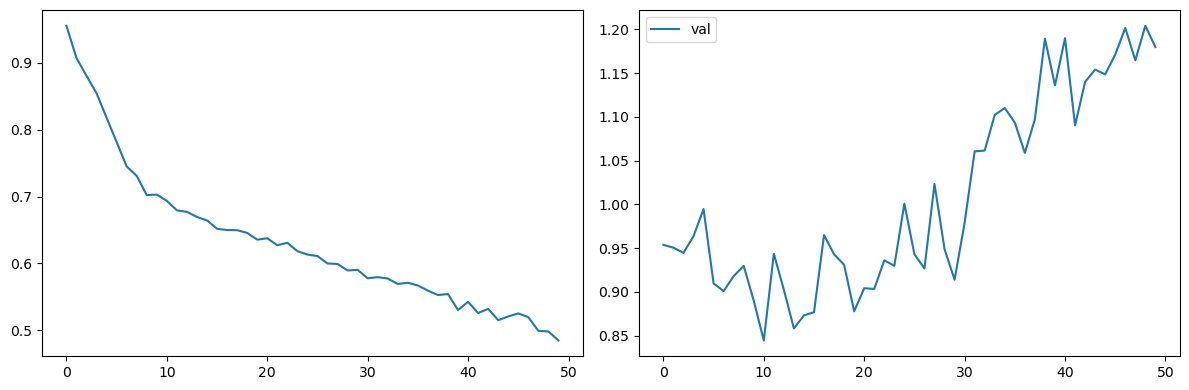

In [84]:
plot_history(history_cnn_lstm)

In [ ]:
## trying on another dataset
predictions = model_cnn_lstm.predict(X_val)


class_map = {0: "sell", 1: "hold", 2: "buy"}
predicted_classes = np.argmax(predictions, axis=1)



predicted_labels = [class_map[i] for i in predicted_classes]

In [87]:
loss, acc = model_cnn_lstm.evaluate(X_val, Y_val)
print(f"Test Accuracy: {acc:.2f}")
print(f"test Loss: {loss:.2f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5274 - loss: 1.2898 
Test Accuracy: 0.56
test Loss: 1.16


In [ ]:
from keras.models import Model
from keras.layers import Input, Conv1D, LSTM, Dense, Dropout, BatchNormalization, GlobalAveragePooling1D

def create_regularized_model(input_shape, num_classes=3):
    """
    Creates a regularized model to reduce overfitting.
    
    Args:
        input_shape (tuple): Shape of input data (timesteps, features).
        num_classes (int): Number of output classes.
        
    Returns:
        keras.Model: Compiled model.
    """
    inputs = Input(shape=input_shape)

    # Convolutional layer for feature extraction
    x = Conv1D(32, kernel_size=3, activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)

    # LSTM layer for temporal dependencies
    x = LSTM(32, return_sequences=False, dropout=0.3, recurrent_dropout=0.2)(x)

    # Fully connected layers with dropout
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.4)(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.3)(x)

    # Output layer
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

# Create and compile the model
regularized_model = create_regularized_model(input_shape=(seq_len, 12))
regularized_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
regularized_model.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)     │ (None, 20, 12)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_13 (Conv1D)              │ (None, 20, 32)         │         1,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 20, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 20, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_29 (LSTM)                  │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,923 (54.39 KB)

 Trainable params: 13,859 (54.14 KB)

 Non-trainable params: 64 (256.00 B)

In [89]:
regularized_model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.5866 - loss: 0.9738 - val_accuracy: 0.5992 - val_loss: 0.9532
Epoch 2/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6293 - loss: 0.9098 - val_accuracy: 0.5992 - val_loss: 0.9269
Epoch 3/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.6411 - loss: 0.8664 - val_accuracy: 0.6057 - val_loss: 0.9070
Epoch 4/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6673 - loss: 0.7914 - val_accuracy: 0.6135 - val_loss: 0.8567
Epoch 5/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.6684 - loss: 0.8026 - val_accuracy: 0.6355 - val_loss: 0.8041
Epoch 6/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6828 - loss: 0.7683 - val_accuracy: 0.6654 - val_loss: 0.7788
Epoch 7/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.6959 - loss: 0.7507 - val_accuracy: 0.6783 - val_loss: 0.7606
Epoch 8/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7128 - loss: 0.7220 - val_accuracy: 0.6835 - v

In [90]:
loss, acc = regularized_model.evaluate(X_val, Y_val)
print(f"Test Accuracy: {acc:.2f}")
print(f"test Loss: {loss:.2f}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6708 - loss: 0.8170 
Test Accuracy: 0.71
test Loss: 0.73


In [135]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have:
# model = your trained model
# X_test = validation features
# y_test = validation labels (ground truth)

# Get predictions
y_pred = regularized_model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)  

# If your y_test is one-hot encoded:
y_true = np.argmax(Y_val, axis=1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [143]:
regularized_model.save("regulized_model.keras")

In [136]:
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=['Sell', 'Hold', 'Buy']))


Classification Report:
              precision    recall  f1-score   support

        Sell       0.71      0.60      0.65        75
        Hold       0.74      0.78      0.76       165
         Buy       0.60      0.64      0.62        45

    accuracy                           0.71       285
   macro avg       0.69      0.68      0.68       285
weighted avg       0.71      0.71      0.71       285



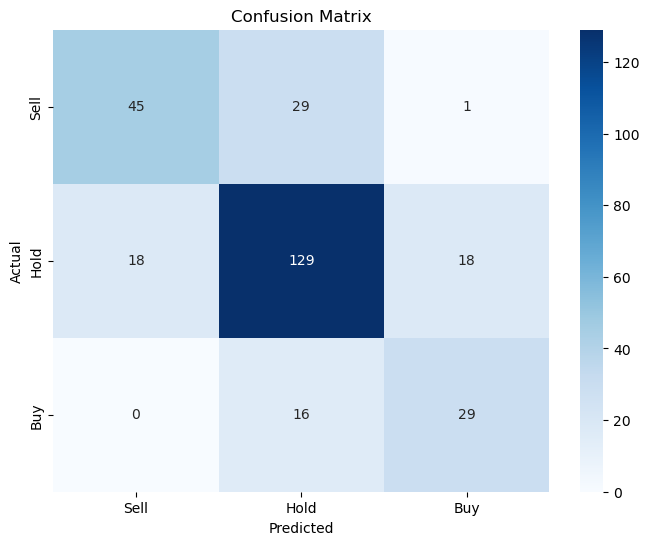

In [137]:
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Sell', 'Hold', 'Buy'],
            yticklabels=['Sell', 'Hold', 'Buy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Next we will try to add weights to our classes to combat the hold classe dominance

In [129]:


Y_train_classes = np.argmax(Y_train, axis=1)

# # Assuming y_train contains class labels (0=Sell, 1=Hold, 2=Buy)
class_counts = np.bincount(Y_train_classes)
total_samples = len(Y_train)

# Inverse frequency weighting (baseline)
class_weights = total_samples / (len(class_counts) * class_counts)
class_weights = dict(enumerate(class_weights))
class_weights
print("Baseline Class Weights:", class_weights)
# Y_train_classes

class_weights = {0: 1.5, 1: 1.0, 2: 1.5}

Baseline Class Weights: {0: 1.946969696969697, 1: 0.5288065843621399, 2: 1.6797385620915033}


In [130]:
from keras.callbacks import EarlyStopping
model_regularized_with_weights = create_regularized_model(input_shape=(seq_len, 12))
model_regularized_with_weights.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [131]:
hist1 = model_regularized_with_weights.fit(
    X_train,
    Y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, Y_test),
    class_weight=class_weights,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)

Epoch 1/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.5333 - loss: 1.2570 - val_accuracy: 0.5992 - val_loss: 0.9657
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6262 - loss: 1.1860 - val_accuracy: 0.5992 - val_loss: 0.9411
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6347 - loss: 1.1313 - val_accuracy: 0.6239 - val_loss: 0.8516
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6387 - loss: 1.0536 - val_accuracy: 0.6044 - val_loss: 0.9307
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6581 - loss: 1.0352 - val_accuracy: 0.6615 - val_loss: 0.8211
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6923 - loss: 0.9761 - val_accuracy: 0.6887 - val_loss: 0.7948
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.7139 - loss: 0.9370 - val_accuracy: 0.6965 - val_loss: 0.7512
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7287 - loss: 0.9318 - val_accuracy: 0.6900 - v

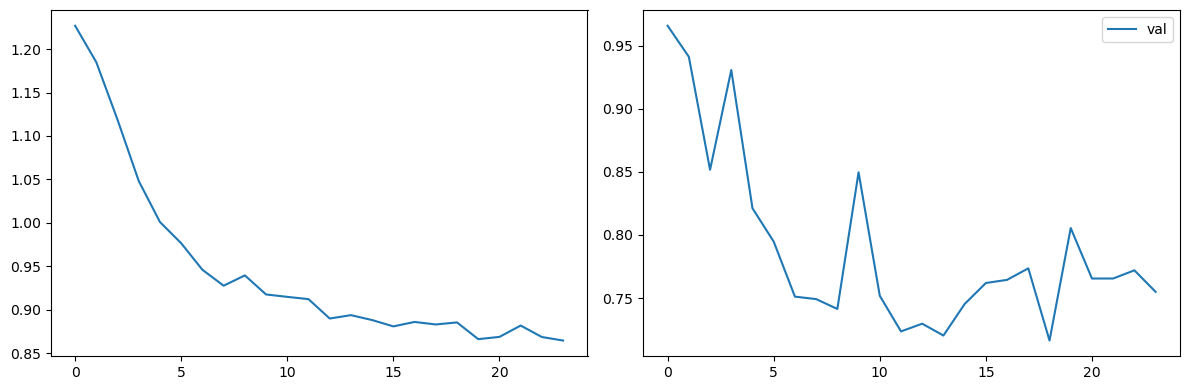

In [132]:
plot_history(hist1)

In [134]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have:
# model = your trained model
# X_test = validation features
# y_test = validation labels (ground truth)

# Get predictions
y_pred = model_regularized_with_weights.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)  

# If your y_test is one-hot encoded:
y_true = np.argmax(Y_val, axis=1)
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=['Sell', 'Hold', 'Buy']))


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Classification Report:
              precision    recall  f1-score   support

        Sell       0.74      0.39      0.51        75
        Hold       0.67      0.87      0.75       165
         Buy       0.59      0.42      0.49        45

    accuracy                           0.67       285
   macro avg       0.67      0.56      0.59       285
weighted avg       0.68      0.67      0.65       285



In [144]:

import numpy as np
from keras.models import load_model

# 1) Load your saved model
model = load_model('./regulized_model.keras')

# 2) Prepare your input data as a NumPy array of shape (n_samples, seq_len, n_features)
#    For example:
# X_new = np.load('X_new.npy')

# 3) Get class‐probabilities and class indices
proba   = model.predict(X)             
pred_ix = np.argmax(proba, axis=1)         

# 4) (Optional) Map back to labels
class_map = {0: 'sell', 1: 'hold', 2: 'buy'}
pred_labels = [class_map[i] for i in pred_ix]

print(pred_labels)


121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
['hold', 'hold', 'hold', 'hold', 'buy', 'buy', 'hold', 'buy', 'buy', 'buy', 'buy', 'buy', 'hold', 'hold', 'hold', 'sell', 'hold', 'hold', 'sell', 'hold', 'hold', 'hold', 'hold', 'buy', 'buy', 'buy', 'hold', 'hold', 'buy', 'buy', 'buy', 'buy', 'buy', 'buy', 'buy', 'buy', 'hold', 'sell', 'sell', 'sell', 'sell', 'sell', 'hold', 'hold', 'buy', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'buy', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'buy', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'sell', 'sell', 'sell', 'sell', 'sell', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'sell', 'sell', 'sell', 'hold', 'hold', 'hold', 'buy', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'buy', 'buy', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'hold', 'buy', 'buy', 'buy', 

In [145]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.evaluate(X_val, Y_val, verbose=0)

[0.5547769069671631, 0.7122806906700134]